In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/sample_data/Phishing_Emails.csv')
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding,GRU,LSTM,Bidirectional,SimpleRNN
from tensorflow.keras.utils import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Dropout
import tensorflow as tf
import warnings

warnings.filterwarnings('ignore')

In [ ]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df.dropna(inplace=True,axis=0)
df.drop_duplicates(inplace=True)
le = LabelEncoder()
df["Email Type"] = le.fit_transform(df["Email Type"])
print("Dimension of the row data:",df.shape)
df.head()

Dimension of the row data: (17538, 2)


,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1
1,the other side of * galicismos * * galicismo *...,1
2,re : equistar deal tickets are you still avail...,1
3,\nHello I am your hot lil horny toy.\n I am...,0
4,software at incredibly low prices ( 86 % lower...,0


In [ ]:
import re

def preprocess_text(text):
    # Remove hyperlinks
    text = re.sub(r'http\S+', '', text)

    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text


# Apply the preprocess_text function to the specified column in the DataFrame
df["Email Text"] =df["Email Text"].apply(preprocess_text)

In [ ]:
max_len = 150

tk = Tokenizer()

# Process the text

tk.fit_on_texts(df['Email Text'])
sequences = tk.texts_to_sequences(df['Email Text'])
vector = pad_sequences(sequences,padding='post', maxlen=max_len)

In [ ]:
len(vector)

17538

In [ ]:
x = np.array(vector)
y = np.array(df["Email Type"])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(vector,df['Email Type'], test_size=0.2, random_state =0)

In [ ]:
# Define model
model_smp = Sequential()

# Ensure input_dim is properly assigned
vocab_size = len(tk.word_index) + 1  # Tokenizer vocabulary size

model_smp.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=150))
model_smp.add(SimpleRNN(units=100))
model_smp.add(Dropout(0.45))
model_smp.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile model
model_smp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Build model before summary (Optional)
model_smp.build(input_shape=(None, 150))

# Check model summary
model_smp.summary()

# Ensure x_train and y_train are properly shaped
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")

# Train the model
historical_smp = model_smp.fit(x_train, y_train, epochs=7, batch_size=16, validation_data=(x_test, y_test))


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 150, 50)             │       9,115,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 100)                 │          15,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,131,051 (34.83 MB)

 Trainable params: 9,131,051 (34.83 MB)

 Non-trainable params: 0 (0.00 B)

x_train shape: (14030, 150), y_train shape: (14030,)
Epoch 1/7
877/877 ━━━━━━━━━━━━━━━━━━━━ 163s 184ms/step - accuracy: 0.5805 - loss: 0.6907 - val_accuracy: 0.6881 - val_loss: 0.5650
Epoch 2/7
877/877 ━━━━━━━━━━━━━━━━━━━━ 202s 184ms/step - accuracy: 0.7022 - loss: 0.5765 - val_accuracy: 0.7363 - val_loss: 0.5010
Epoch 3/7
877/877 ━━━━━━━━━━━━━━━━━━━━ 202s 184ms/step - accuracy: 0.7258 - loss: 0.5110 - val_accuracy: 0.7263 - val_loss: 0.4966
Epoch 4/7
877/877 ━━━━━━━━━━━━━━━━━━━━ 200s 182ms/step - accuracy: 0.7450 - loss: 0.4463 - val_accuracy: 0.7061 - val_loss: 0.4664
Epoch 5/7
877/877 ━━━━━━━━━━━━━━━━━━━━ 161s 183ms/step - accuracy: 0.7544 - loss: 0.4113 - val_accuracy: 0.8791 - val_loss: 0.3239
Epoch 6/7
877/877 ━━━━━━━━━━━━━━━━━━━━ 202s 183ms/step - accuracy: 0.8233 - loss: 0.3786 - val_accuracy: 0.6970 - val_loss: 0.5475
Epoch 7/7
877/877 ━━━━━━━━━━━━━━━━━━━━ 203s 185ms/step - accuracy: 0.6758 - loss: 0.5336 - val_accuracy: 0.7383 - val_loss: 0.4778


Text(0, 0.5, 'Loss')

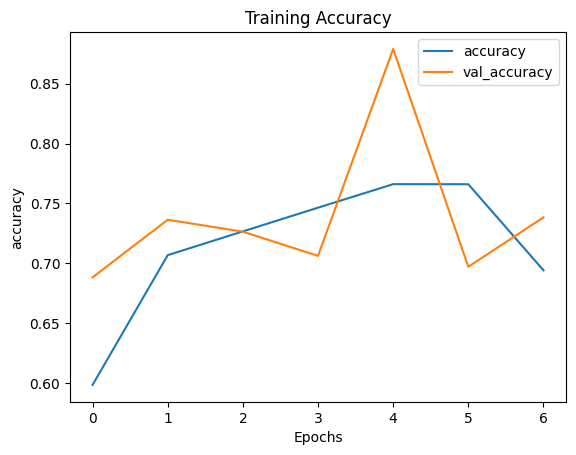

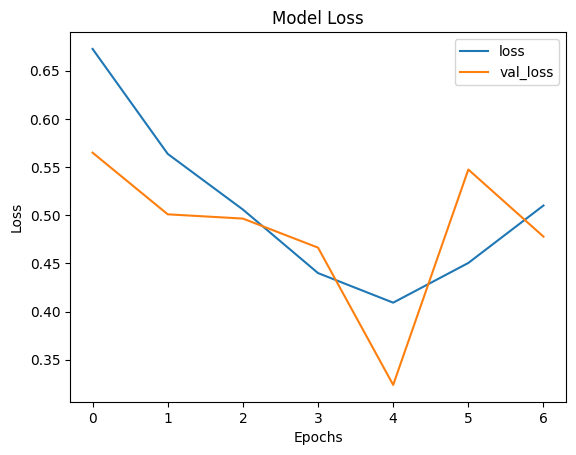

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(historical_smp.history)

pd.DataFrame(historical_smp.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

pd.DataFrame(historical_smp.history)[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step


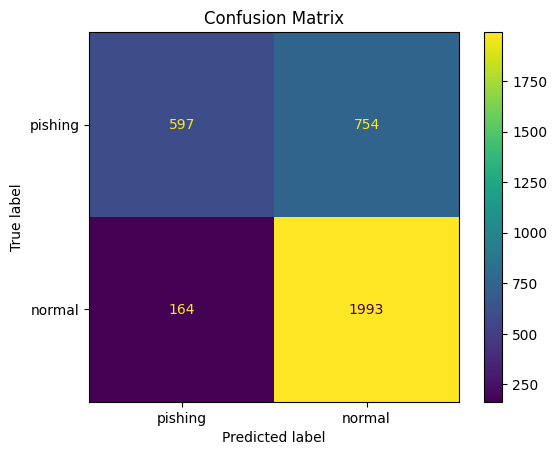

In [ ]:
y_pred_prob_smp = model_smp.predict(x_test)
y_pred_smp = (y_pred_prob_smp > 0.5).astype(int)

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cnf_smp = confusion_matrix(y_test,y_pred_smp)
ax_smp = ConfusionMatrixDisplay(confusion_matrix=cnf_smp,display_labels=['pishing','normal']).plot()
plt.title("Confusion Matrix")
plt.show()